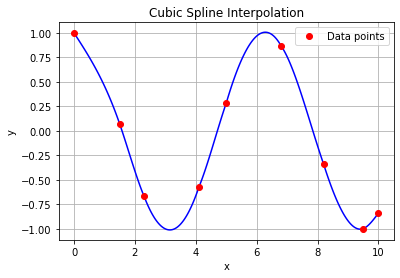

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1.5, 2.3, 4.1, 5, 6.8, 8.2, 9.5, 10])
x = np.sort(x)
y = np.cos(x)

def setup_tridiagonal_matrix(x, y):
    n = len(x)
    h = np.diff(x) # Step sizes between data points
    # Initialize the tridiagonal matrix coefficients
    A = np.zeros(n - 2) # Subdiagonal
    B = np.zeros(n - 2) # Main diagonal
    C = np.zeros(n - 2) # Superdiagonal
    D = np.zeros(n - 2) # Right-hand side vector
    # Populate the tridiagonal matrix coefficients
    for i in range(1, n - 1):
        A[i - 1] = h[i - 1] # Subdiagonal
        B[i - 1] = 2 * (h[i - 1] + h[i]) # Main diagonal
        C[i - 1] = h[i] # Superdiagonal
        D[i - 1] = 6 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1]) # Right-hand side vector
    return A, B, C, D



# Set up the tridiagonal matrix for the cubic spline


def thomas_algorithm(a, b, c, d):

    n = len(b)
    # Forward elimination
    for i in range(1, n):
        w = a[i-1] / b[i-1]
        b[i] = b[i] - w * c[i-1]
        d[i] = d[i] - w * d[i-1]
    # Back substitution
    x = np.zeros(n)
    x[-1] = d[-1] / b[-1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]
    return x

def evaluate_spline(x, y):
    A, B, C, D = setup_tridiagonal_matrix(x, y)
    M = np.zeros(len(x))
    M[1:-1] = thomas_algorithm(A, B, C, D)
    
    
    for i in range(len(x) - 1):
        h = x[i + 1] - x[i]
        xi = np.linspace(x[i], x[i + 1], 100)
        
        # Cubic spline formula for segment [x_i, x_{i+1}]
        Si = (M[i] * (x[i + 1] - xi)**3 / (6 * h) +
              M[i + 1] * (xi - x[i])**3 / (6 * h) +
              (y[i] - M[i] * h**2 / 6) * (x[i + 1] - xi) / h +
              (y[i + 1] - M[i + 1] * h**2 / 6) * (xi - x[i]) / h)
        
        plt.plot(xi, Si, 'b')

    # Plot original data points
    plt.plot(x, y, 'ro', label='Data points')
    plt.title('Cubic Spline Interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to evaluate and plot the spline
evaluate_spline(x, y)